In [1]:
from path import Path
from fastai.vision import *
import numpy as np
import pandas as pd
from PIL import Image
import json
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler


from ipywidgets import IntProgress
from IPython.display import display
import time


from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

from torchvision.models import inception_v3 as inception

In [2]:
path = Path('/home/jupyter/kaggle/imagenet_localization/data')

In [3]:
path.ls()

[PosixPath('/home/jupyter/kaggle/imagenet_localization/data/models'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/val.pkl'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/LOC_val_solution.csv'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/ILSVRC'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/train.csv'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/LOC_sample_submission.csv'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/LOC_train_solution.csv'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/LOC_synset_mapping.txt'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/data.sh'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/train.pkl'),
 PosixPath('/home/jupyter/kaggle/imagenet_localization/data/val.csv')]

In [4]:
# synset_mapping = {}
# with open(path/'LOC_synset_mapping.txt') as f:
#     for line in f:
#         synset_id = line.split(" ")[0]
#         literal_id = line.split(synset_id)[1].strip()
#         synset_mapping[synset_id] = literal_id
# df_synset = pd.DataFrame(data=synset_mapping.values(), index=synset_mapping.keys(), columns=['wnid'])
# df_synset = df_synset.reset_index().rename(columns={'index':'id'})
# df_synset['class'] = df_synset.index + 1

In [5]:
# data_path = 'ILSVRC/Data/CLS-LOC/'
# df_train_solution = pd.read_csv(path/'LOC_train_solution.csv')
# s_filename = data_path + "train/" + df_train_solution.ImageId.str.split("_").str[0] + \
#              "/" + df_train_solution.ImageId + '.JPEG'

In [6]:
# s_synclasses = []
# s_bboxes = []
# for idx, row in tqdm(df_train_solution.PredictionString.str.strip().str.split(" ").iteritems(), total=len(df_train_solution)):
#     num_boxes = len(row) // 5
#     synset_ids = [row[i * 5] for i in range(num_boxes)]
#     synset_classes = [df_synset.loc[df_synset.id == synset_id]['class'].iloc[0] for synset_id in synset_ids]
#     bboxes = [[int(row[4 + j*5]), int(row[1 + j*5]), int(row[2 + j*5]), int(row[3 + j*5])] for j in range(num_boxes)]
#     s_synclasses.append(synset_classes)
#     s_bboxes.append(bboxes)

In [7]:
# df_train_solution['classes'] = pd.Series(index=df_train_solution.index, data=s_synclasses)
# df_train_solution['bboxes'] = pd.Series(index=df_train_solution.index, data=s_bboxes)
# df_train_solution['image'] = s_filename
# df_train_solution[['image', 'bboxes', 'classes']].to_pickle(path/'train.pkl')

In [8]:
# df_val_solution = pd.read_csv(path/'LOC_val_solution.csv')
# s_filename = data_path + "val/" + df_val_solution.ImageId + '.JPEG'

In [9]:
# s_synclasses = []
# s_bboxes = []
# for idx, row in tqdm(df_val_solution.PredictionString.str.strip().str.split(" ").iteritems(), total=len(df_val_solution)):
#     num_boxes = len(row) // 5
#     synset_ids = [row[i * 5] for i in range(num_boxes)]
#     synset_classes = [df_synset.loc[df_synset.id == synset_id]['class'].iloc[0] for synset_id in synset_ids]
#     bboxes = [[int(row[4 + j*5]), int(row[1 + j*5]), int(row[2 + j*5]), int(row[3 + j*5])] for j in range(num_boxes)]
#     s_synclasses.append(synset_classes)
#     s_bboxes.append(bboxes)

In [10]:
# df_val_solution['classes'] = pd.Series(index=df_val_solution.index, data=s_synclasses)
# df_val_solution['bboxes'] = pd.Series(index=df_val_solution.index, data=s_bboxes)
# df_val_solution['image'] = s_filename
# df_val_solution[['image', 'bboxes', 'classes']].to_pickle(path/'val.pkl')

In [11]:
df_train  = pd.read_pickle(path/'train.pkl')
df_val = pd.read_pickle(path/'val.pkl')

In [12]:
df_train.head()

,image,bboxes,classes
0,ILSVRC/Data/CLS-LOC/train/n02017213/n02017213_...,"[[294, 115, 49, 448]]",[137]
1,ILSVRC/Data/CLS-LOC/train/n02017213/n02017213_...,"[[432, 91, 42, 330]]",[137]
2,ILSVRC/Data/CLS-LOC/train/n02017213/n02017213_...,"[[224, 230, 104, 414]]",[137]
3,ILSVRC/Data/CLS-LOC/train/n02017213/n02017213_...,"[[387, 46, 82, 464]]",[137]
4,ILSVRC/Data/CLS-LOC/train/n02017213/n02017213_...,"[[335, 103, 66, 331]]",[137]


In [13]:
df_val.head()

,image,bboxes,classes
0,ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_0004898...,"[[272, 85, 1, 499]]",[741]
1,ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_0003795...,"[[254, 131, 0, 499]]",[588]
2,ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_0002616...,"[[280, 38, 0, 464]]",[242]
3,ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_0002617...,"[[299, 0, 14, 216]]",[513]
4,ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_0000872...,"[[329, 255, 142, 454], [295, 44, 21, 322]]","[279, 279]"


In [14]:
df_train['train_valid'] = 0
df_val['train_valid'] = 1
df_concat = pd.concat([df_train.sample(5000), df_val.sample(1000)])
cols = ['file_name', 'category_id', 'train_valid']

In [15]:
x = [list(x) for x in zip(df_concat.bboxes, df_concat.classes)]
img2bbox = dict(zip(df_concat.image, x))
get_y_func = lambda o:img2bbox[o.replace(str(path) + "/", "")]

In [16]:
data = None
gc.collect()

model = models.resnet34
sz = 224
bs = 16

tfms = get_transforms(do_flip=True, flip_vert=False)
data = (ObjectItemList.from_df(df_concat, path=path)
        .split_from_df(col=3)
        .label_from_func(get_y_func)
        .transform(tfms, tfm_y=True, size=(sz, sz))
        .databunch(bs=bs, collate_fn=bb_pad_collate)
        .normalize(imagenet_stats)
       )

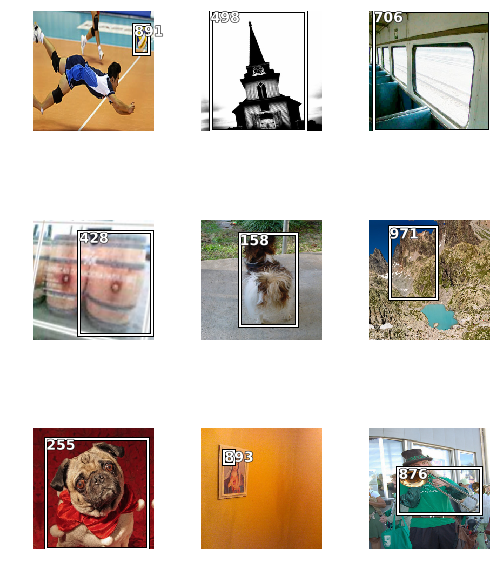

In [17]:
data.show_batch(rows=3, figsize=(7, 9))

In [18]:
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, dropout=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(dropout)
    def forward(self, x):
        return self.drop(self.bn(F.relu(self.conv(x))))
    
def flatten_conv(x, k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs, -1, nf//k)

class OutConv(nn.Module):
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, (data.c + 1) * k, 3, padding=1)
        self.oconv2 = nn.Conv2d(nin, 4*k, 3, padding=1)
        self.oconv1.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k), flatten_conv(self.oconv2(x), self.k)]
    
class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(.25)
        self.sconv0 = StdConv(512, 256, stride=1)
        self.sconv1 = StdConv(256, 256)
        self.out = OutConv(k, 256, bias)
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
        x = self.sconv1(x)
        return self.out(x)
    
k = 1
f_model = models.resnet34
head_reg4 = SSD_Head(k, -3.)
learn = cnn_learner(data, f_model, custom_head=head_reg4)

In [378]:
###Define helper functions
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def bb_hw(a): 
    """Reshapes bounding box from bottom left (x,y), top right (x,y) to
       bottom left y, bottom left x, height, width
    """
    return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

def draw_outline(o, lw):
    """Adds black border around line
    """
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    """Draws bounding rectangle
    """
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)
    
def draw_text(ax, xy, txt, sz=14, color='white'):
    """Draws text inside bounding rectangle
    """
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)
    
def get_cmap(N):
    """Gets colors
    """
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

def show_ground_truth(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    """Given ax, image, list of bboxes, list of classes, list of probabilities and threshold
       Displays image with ground truth broxes
    """
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>0) and (pr is None or pr > thresh)):
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{i}: '
            if c is not None: txt += str('bg' if c==data.c else data.classes[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2], txt, color=colr_list[i%num_colr])

num_colr = 12
cmap = get_cmap(num_colr)
colr_list = [cmap(float(x)) for x in range(num_colr)]

def torch_gt(ax, ima, bbox, clas, prs=None, thresh=0.3):
    """Show ground truth given image and torch bbox
    """
    bbox = (bbox + 1) / 2
    return show_ground_truth(ax, ima, to_np((bbox*224).long()),
         to_np(clas), to_np(prs) if prs is not None else None, thresh)

def get_y(y_0:torch.tensor, y_1:torch.tensor):
    """Returns tensor with 0 rows removed
    """
    return y_0[y_0 != 0], y_1[y_1 != 0]

def hw2corners(ctr, hw): 
    """Converts array of x,y and height,width to top-left, bottom-right
    """
    return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

def actn_to_bb(actn, anchors):
    """Mapping activation to anchor boxes
    """
    actn_bbs = torch.tanh(actn) #hyperbolic tangent of activation
    actn_centers = ((actn_bbs[:, :2]/2).float() * grid_sizes.cuda().float()) + anchors[:,:2].cuda() #center relative to anchor box
    actn_hw = ((actn_bbs[:, 2:]/2).float() + 1) * anchors[:,2:].cuda() #get height and width relative to anchor box
    return hw2corners(actn_centers, actn_hw)

def intersection(box_a, box_b):
    """Computes intersection between two boxes
    """
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b):
    """Computes box size of b
    """
    return (b[:, 2] - b[:, 0]) * (b[:, 3] - b[:, 1]) #height x width

def jaccard(box_a, box_b):
    """Computes jaccard distance between two boxes
    """
    inter = intersection(box_a, box_b)
    union = (box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter)
    return inter/union

def map_to_ground_truth(overlaps, verbose=False):
    """To come
    """
    prior_overlap, prior_idx = overlaps.max(1)
    if verbose: print(prior_overlap)
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap, gt_idx

def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes
        
    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes + 1)
        t = t[:,:-1].contiguous()
        x = pred[:, :-1].cpu()
        w = self.get_weight(x, t)
        return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/self.num_classes
    
    def get_weight(self, x, t):
        return None

In [379]:
idx = 6
x,y = next(iter(data.valid_dl))

In [380]:
y[0][idx].view(-1, 4), y[1][idx], [data.classes[i] for i in to_np(y[1][idx]) if i > 0]

(tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.1377, -1.0000,  0.7665,  0.8880]], device='cuda:0'),
 tensor([ 0,  0,  0,  0,  0,  0,  0,  0, 

In [381]:
learn.model.eval()
batch = learn.model(x)
b_clas,b_bb = batch

In [382]:
b_clasi = b_clas[idx]
b_bbi = b_bb[idx].float()

In [383]:
mean = torch.tensor(imagenet_stats[0])
std = torch.tensor(imagenet_stats[1])
ima = to_np(denormalize(x, mean, std)[idx].permute(1,2,0))
bbox, clas = get_y(y[0][idx], y[1][idx])

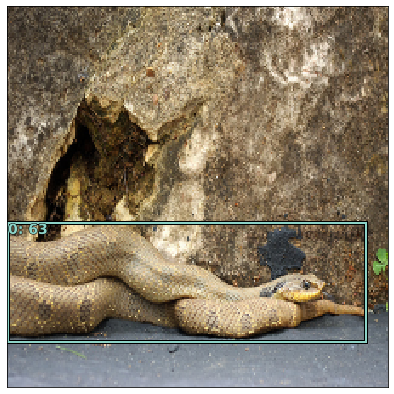

In [384]:
# visualizing the ground truth image and classes and BBs
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, bbox, clas)

In [385]:
#generating 16 ABs
anc_grid = 4
k = 1 #number of possible combinations of ABs we are producing

anc_offset = 1/(anc_grid*2)
# X coords of center of ABs
anc_x = np.repeat(np.linspace(anc_offset, 1 - anc_offset, anc_grid), anc_grid)

# Y coords of center of ABs
anc_y = np.tile(np.linspace(anc_offset, 1 - anc_offset, anc_grid), anc_grid)

# putting X and Y ctrs together
anc_ctrs = np.tile(np.stack([anc_x, anc_y], axis=1), (k, 1))
anc_sizes = np.array([[1/anc_grid,1/anc_grid] for i in range(anc_grid*anc_grid*k)])
anchors = torch.tensor(np.concatenate([anc_ctrs, anc_sizes], axis=1))
grid_sizes = torch.tensor(np.array([1/anc_grid])).unsqueeze(1)

(0, 1)

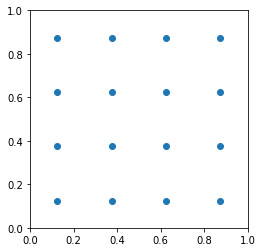

In [386]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')
plt.scatter(anc_x, anc_y)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [387]:
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])

In [388]:
#class assigned to each AB (highest probability)
["AB {0}; class ID {1}; class {2}".format(i+1, j, 'bg' if j==data.c else data.classes[j]) for i, j in enumerate(to_np(b_clasi.max(1)[1]))]
 

['AB 1; class ID 432; class 434',
 'AB 2; class ID 124; class 126',
 'AB 3; class ID 102; class 104',
 'AB 4; class ID 705; class 710',
 'AB 5; class ID 124; class 126',
 'AB 6; class ID 432; class 434',
 'AB 7; class ID 432; class 434',
 'AB 8; class ID 774; class 780',
 'AB 9; class ID 653; class 658',
 'AB 10; class ID 124; class 126',
 'AB 11; class ID 774; class 780',
 'AB 12; class ID 774; class 780',
 'AB 13; class ID 533; class 535',
 'AB 14; class ID 124; class 126',
 'AB 15; class ID 220; class 222',
 'AB 16; class ID 650; class 655']

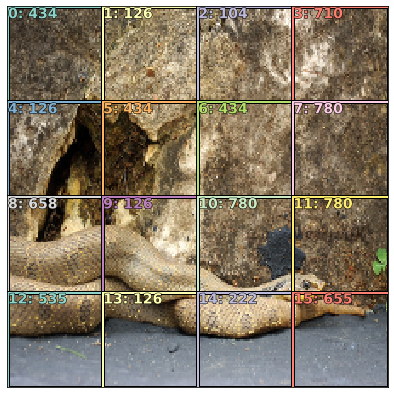

In [389]:
#visualizing ABs with class prediction for the part they're responsible for
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, (anchor_cnr * 2 - 1), b_clasi.max(1)[1])

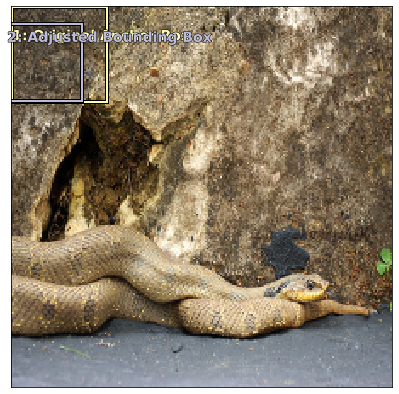

In [390]:
a_ic = actn_to_bb(b_bbi, anchors.float())

#slightly modified show_ground_truth to visualize actn_to_bb
def show_ground_truth2(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    """Displays anchor box, predicted activation and recentered activation
    """
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    k=0
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>0) and (pr is None or pr > thresh)):
            k+=1
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{k}: '
            if isinstance(c, str):
                txt += c
            else:
                if c is not None: txt += str('bg' if c==data.c else data.classes[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2] + np.array([0, np.random.randint(0, 40)]), txt, color=colr_list[i%num_colr])
            
#example with first AB act of batch
ab_idx = 0
bbo = torch.cat((b_bbi[ab_idx,:], anchor_cnr[ab_idx, :].cuda().float(), a_ic[ab_idx, :]), 0).view(3,4)

# as you can see the ABAct (1) is far from the AB it is anchored to (2)
# we re-center it on 2 and alter its position/size
fig, ax = plt.subplots(figsize=(7,7))
show_ground_truth2(ax, ima, to_np((bbo*224).long()), ['Predicted Bounding Box', 'Original Anchor Box', 'Adjusted Bounding Box'])

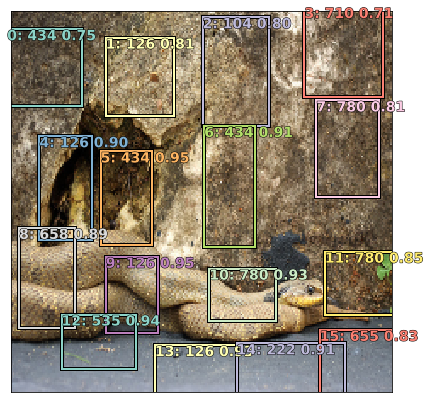

In [391]:
# this is the result after all ABAct have gone through AB re-centering
# and position/size alterations
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, a_ic * 2 - 1, b_clasi.max(1)[1], b_clasi.max(1)[0].sigmoid(), thresh=0.0)

In [392]:
#overlapping ABs and ground truth BBs
#overlap is [num BBs] x 16
overlaps = jaccard(((bbox + 1)/2).unsqueeze(0).data, anchor_cnr.data.cuda().float())

In [393]:
overlaps.max(0)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1442,
         0.1442, 0.1442, 0.1084, 0.1022, 0.1022, 0.1022, 0.0775],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))

In [394]:
gt_overlap, gt_idx = map_to_ground_truth(overlaps)
gt_clas = clas[gt_idx]

In [395]:
thresh = 0.4
pos = gt_overlap > thresh
pos_idx = torch.nonzero(pos)[:, 0]
neg_idx = torch.nonzero(1 - pos)[:, 0]

In [396]:
gt_clas[1-pos] = data.c
[data.classes[o] if o < data.c else 'bg' for o in gt_clas]

['bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 63,
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg']

In [403]:
gt_bbox = bbox.unsqueeze(0)[gt_idx]
loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
loss_f = BCE_Loss(data.c)
clas_loss = loss_f(b_clasi, gt_clas)
loc_loss, clas_loss

(tensor(0.5592, device='cuda:0', grad_fn=<MeanBackward1>),
 tensor(11.9281, grad_fn=<DivBackward0>))